<a href="https://colab.research.google.com/github/dalania/webscraping-reclame-aqui/blob/main/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS


In [48]:

df = pd.read_csv('dados.csv')


In [3]:
df.head()

,Nome Da Loja,Total de reclamaçoes,Reclamações Respondidas,Voltariam a fazer negogicio,Indice de soluçao,Nota do consumidor,Reputação,Reclamacoes/0/titulo,Reclamacoes/0/texto,Reclamacoes/1/titulo,Reclamacoes/1/texto,Reclamacoes/2/titulo,Reclamacoes/2/texto,Reclamacoes/3/titulo,Reclamacoes/3/texto,Reclamacoes/4/titulo,Reclamacoes/4/texto,Percentual de atraso na entrega,Percentual de outro tipo de produto/serviço,Percentual de celulares e smartphones,Percentual de eletrodomésticos,Percentual de outro problema,Percentual de não encontrei meu problema
0,americanas-com-loja-online,128070,96.2,78.3%,89.3%,7.41,8.4,Pedido atrasado,No dia 24 de dezembro comprei uma escova secad...,Produto não recebido,Fiz uma compra na americanas no dia 03/01a ent...,Comprei Soundbar LG SNH5 no dia seguinte estav...,Boa tarde.Comprei Soundbar LG SNH5 (Pedido: 02...,Pagamento via pix e não encontro o pedido,Ontem no período da tarde umas 16:00 fui até o...,Compra nas americanas = pesadelo / aguardo vale,Fiz uma compra meu pedido: 02-908287245 depois...,18.06%,15.98%,21.19%,NaN,NaN,NaN
1,magazine-luiza-loja-online,342900,96.8,75.6%,90.8%,7.20,8.3,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL",Meu cartão Magalu chegou fui desbloquear no ap...,Descaso com o histórico do cliente,Não negocia absolutamente nada em relação ao c...,Devolvi mercadorias e não tive estorno valor,Em meados do mês de outubro comprei 7 vestidos...,Comprei um sofá novo e recebi um rasgado,Dia 26 de novembro comprei um conjunto de sofá...,Atrazo na entrega / Cancelamento,Realizei a compra no dia 10/12 pela internet. ...,15.96%,23.12%,NaN,11.94%,NaN,NaN
2,carrefour-loja-online,106132,99.0,39.6%,72.5%,3.95,6.1,Carrefour e Sip Comércio cancelaram meu pedido...,Fiz um pedido no dia 18/12/21 no site Carrefou...,Não entregou,"No dia 09/12/2021, fiz um pedido de um kit de ...","Televisão Samsung não liga, e não resolvem!",No dia 21/11/2021 realizei uma compra de uma t...,Bicicleta quadro empenado comprada no Carrefour,No dia 5/12/21 comprei duas bicicletas Caloi n...,Estorno,"Fiz o pedido e veio faltando itens, não conseg...",NaN,48.63%,NaN,NaN,44.88%,40.48%
3,casas-bahia-loja-online,198144,95.5,53.3%,77.4%,5.17,6.8,Transtorno na entrega,Eu havia escolhido Retirada Rápida por ser no ...,Pagamento em PIX que ainda aguarda confirmação,No dia 23/12/21 realizei compra de uma TV 50&q...,Falta de respeito e informações,Boa noite!Fiz uma compra de 2 produtos no site...,Compra nao entregue,Comprei uma panela de pressão de 7litros no di...,Meu produto não chegou,"Como o produto não chegou, entrei em contato c...",NaN,19.59%,15.3%,NaN,14.99%,NaN
4,amazon,143487,99.3,77.7%,82.5%,7.41,8.2,TRANSPORTADORA PÉSSIMA,"Cara Amazon, faço compras com vocês com certa ...",Conta suspensa,A um tempo fiz uma compra pelo site e deu tudo...,Cobrança indevida,"Mas uma vez foi feita uma cobrança indevida, c...",Cobrança indevida,"Pago o plano mensalmente no valor de R$9,90. E...",Demora na entrega,"A entrega estava prevista para dia 04/01/2022,...",NaN,30.84%,NaN,NaN,17%,20.97%


**Quantidade de Amostras do Dataframe**

In [4]:
df.shape[0]

6

**Quantidade de colunas**

In [5]:
df.shape[1]

23

**Substitui os espaços da coluna por _**

In [6]:
df.columns = df.columns.str.replace(' ', '_') 



**Nomes das colunas**

In [7]:
df.columns.values

array(['Nome_Da_Loja', 'Total_de_reclamaçoes', 'Reclamações_Respondidas',
       'Voltariam_a_fazer_negogicio', 'Indice_de_soluçao',
       'Nota_do_consumidor', 'Reputação', 'Reclamacoes/0/titulo',
       'Reclamacoes/0/texto', 'Reclamacoes/1/titulo',
       'Reclamacoes/1/texto', 'Reclamacoes/2/titulo',
       'Reclamacoes/2/texto', 'Reclamacoes/3/titulo',
       'Reclamacoes/3/texto', 'Reclamacoes/4/titulo',
       'Reclamacoes/4/texto', 'Percentual_de_atraso_na_entrega',
       'Percentual_de_outro_tipo_de_produto/serviço',
       'Percentual_de_celulares_e_smartphones',
       'Percentual_de_eletrodomésticos', 'Percentual_de_outro_problema',
       'Percentual_de_não_encontrei_meu_problema'], dtype=object)



**Tipos de dados das colunas**


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Nome_Da_Loja                                 6 non-null      object 
 1   Total_de_reclamaçoes                         6 non-null      int64  
 2   Reclamações_Respondidas                      6 non-null      float64
 3   Voltariam_a_fazer_negogicio                  6 non-null      object 
 4   Indice_de_soluçao                            6 non-null      object 
 5   Nota_do_consumidor                           6 non-null      float64
 6   Reputação                                    6 non-null      float64
 7   Reclamacoes/0/titulo                         6 non-null      object 
 8   Reclamacoes/0/texto                          6 non-null      object 
 9   Reclamacoes/1/titulo                         6 non-null      object 
 10  Reclam

**verifica quantas amostras possuem valor NaN por coluna**


In [9]:
df.isna().sum()

Nome_Da_Loja                                   0
Total_de_reclamaçoes                           0
Reclamações_Respondidas                        0
Voltariam_a_fazer_negogicio                    0
Indice_de_soluçao                              0
Nota_do_consumidor                             0
Reputação                                      0
Reclamacoes/0/titulo                           0
Reclamacoes/0/texto                            0
Reclamacoes/1/titulo                           0
Reclamacoes/1/texto                            0
Reclamacoes/2/titulo                           0
Reclamacoes/2/texto                            0
Reclamacoes/3/titulo                           0
Reclamacoes/3/texto                            0
Reclamacoes/4/titulo                           0
Reclamacoes/4/texto                            0
Percentual_de_atraso_na_entrega                3
Percentual_de_outro_tipo_de_produto/serviço    0
Percentual_de_celulares_e_smartphones          3
Percentual_de_eletro

In [25]:
#Mostra os valores uncios
df['Reclamacoes/0/titulo'].unique()


array(['Pedido atrasado',
       'NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL',
       'Carrefour e Sip Comércio cancelaram meu pedido, não avisou e não estornou meu valor até o momento',
       'Transtorno na entrega', 'TRANSPORTADORA PÉSSIMA',
       'Compra de máquina de lavar não recebi e cancelaram o pedido'],
      dtype=object)

In [26]:
df['Reclamacoes/1/titulo'].unique()


array(['Produto não recebido', 'Descaso com o histórico do cliente',
       'Não entregou', 'Pagamento em PIX que ainda aguarda confirmação',
       'Conta suspensa', 'Coifa não chegou. 0800 desliga na cara!'],
      dtype=object)

In [27]:
df['Reclamacoes/2/titulo'].unique()


array(['Comprei Soundbar LG SNH5 no dia seguinte estava com R$160 de desconto.',
       'Devolvi mercadorias e não tive estorno valor',
       'Televisão Samsung não liga, e não resolvem!',
       'Falta de respeito e informações', 'Cobrança indevida',
       'Falta de respeito ao direito do consumidor.'], dtype=object)

In [28]:
df['Reclamacoes/3/titulo'].unique()


array(['Pagamento via pix e não encontro o pedido',
       'Comprei um sofá novo e recebi um rasgado',
       'Bicicleta quadro empenado comprada no Carrefour',
       'Compra nao entregue', 'Cobrança indevida',
       'Não reembolsam integralmente'], dtype=object)

In [29]:
df['Reclamacoes/4/titulo'].unique()


array(['Compra nas americanas = pesadelo / aguardo vale',
       'Atrazo na entrega / Cancelamento', 'Estorno',
       'Meu produto não chegou', 'Demora na entrega',
       'Entrega do produto no prazo errado e falta de estorno.'],
      dtype=object)

In [10]:
#Mostra as 5 ultimas amostras
df.tail()

,Nome_Da_Loja,Total_de_reclamaçoes,Reclamações_Respondidas,Voltariam_a_fazer_negogicio,Indice_de_soluçao,Nota_do_consumidor,Reputação,Reclamacoes/0/titulo,Reclamacoes/0/texto,Reclamacoes/1/titulo,Reclamacoes/1/texto,Reclamacoes/2/titulo,Reclamacoes/2/texto,Reclamacoes/3/titulo,Reclamacoes/3/texto,Reclamacoes/4/titulo,Reclamacoes/4/texto,Percentual_de_atraso_na_entrega,Percentual_de_outro_tipo_de_produto/serviço,Percentual_de_celulares_e_smartphones,Percentual_de_eletrodomésticos,Percentual_de_outro_problema,Percentual_de_não_encontrei_meu_problema
1,magazine-luiza-loja-online,342900,96.8,75.6%,90.8%,7.20,8.3,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL",Meu cartão Magalu chegou fui desbloquear no ap...,Descaso com o histórico do cliente,Não negocia absolutamente nada em relação ao c...,Devolvi mercadorias e não tive estorno valor,Em meados do mês de outubro comprei 7 vestidos...,Comprei um sofá novo e recebi um rasgado,Dia 26 de novembro comprei um conjunto de sofá...,Atrazo na entrega / Cancelamento,Realizei a compra no dia 10/12 pela internet. ...,15.96%,23.12%,NaN,11.94%,NaN,NaN
2,carrefour-loja-online,106132,99.0,39.6%,72.5%,3.95,6.1,Carrefour e Sip Comércio cancelaram meu pedido...,Fiz um pedido no dia 18/12/21 no site Carrefou...,Não entregou,"No dia 09/12/2021, fiz um pedido de um kit de ...","Televisão Samsung não liga, e não resolvem!",No dia 21/11/2021 realizei uma compra de uma t...,Bicicleta quadro empenado comprada no Carrefour,No dia 5/12/21 comprei duas bicicletas Caloi n...,Estorno,"Fiz o pedido e veio faltando itens, não conseg...",NaN,48.63%,NaN,NaN,44.88%,40.48%
3,casas-bahia-loja-online,198144,95.5,53.3%,77.4%,5.17,6.8,Transtorno na entrega,Eu havia escolhido Retirada Rápida por ser no ...,Pagamento em PIX que ainda aguarda confirmação,No dia 23/12/21 realizei compra de uma TV 50&q...,Falta de respeito e informações,Boa noite!Fiz uma compra de 2 produtos no site...,Compra nao entregue,Comprei uma panela de pressão de 7litros no di...,Meu produto não chegou,"Como o produto não chegou, entrei em contato c...",NaN,19.59%,15.3%,NaN,14.99%,NaN
4,amazon,143487,99.3,77.7%,82.5%,7.41,8.2,TRANSPORTADORA PÉSSIMA,"Cara Amazon, faço compras com vocês com certa ...",Conta suspensa,A um tempo fiz uma compra pelo site e deu tudo...,Cobrança indevida,"Mas uma vez foi feita uma cobrança indevida, c...",Cobrança indevida,"Pago o plano mensalmente no valor de R$9,90. E...",Demora na entrega,"A entrega estava prevista para dia 04/01/2022,...",NaN,30.84%,NaN,NaN,17%,20.97%
5,extra-loja-online,58048,97.6,52.9%,78.7%,5.17,6.9,Compra de máquina de lavar não recebi e cancel...,Comprei uma máquina de lavar no dia 27/11/21 c...,Coifa não chegou. 0800 desliga na cara!,Comprei no dia 03/01/2022 uma Coifa de Parede ...,Falta de respeito ao direito do consumidor.,"Em 01.10.2020, há mais de um ano. Acreditem, m...",Não reembolsam integralmente,"De verdade, parece brincadeira. Tive problema ...",Entrega do produto no prazo errado e falta de ...,"No dia 23/08/21, fiz uma compra pela internet ...",16.01%,14.02%,12.76%,NaN,NaN,NaN


In [11]:
df.count()

Nome_Da_Loja                                   6
Total_de_reclamaçoes                           6
Reclamações_Respondidas                        6
Voltariam_a_fazer_negogicio                    6
Indice_de_soluçao                              6
Nota_do_consumidor                             6
Reputação                                      6
Reclamacoes/0/titulo                           6
Reclamacoes/0/texto                            6
Reclamacoes/1/titulo                           6
Reclamacoes/1/texto                            6
Reclamacoes/2/titulo                           6
Reclamacoes/2/texto                            6
Reclamacoes/3/titulo                           6
Reclamacoes/3/texto                            6
Reclamacoes/4/titulo                           6
Reclamacoes/4/texto                            6
Percentual_de_atraso_na_entrega                3
Percentual_de_outro_tipo_de_produto/serviço    6
Percentual_de_celulares_e_smartphones          3
Percentual_de_eletro

In [12]:

# Cria um novo dataset com o nome da loja, o total de reclmações, e as reclamações respondidas

dfEdited = df[['Nome_Da_Loja', 'Total_de_reclamaçoes', 'Reclamações_Respondidas']]

In [13]:
#Descrição estatisticas das colunas númericas do datagrame
df.describe()

,Total_de_reclamaçoes,Reclamações_Respondidas,Nota_do_consumidor,Reputação
count,6.000000,6.000000,6.000000,6.000000
mean,162796.833333,97.400000,6.051667,7.450000
std,99447.088316,1.524467,1.481923,0.973139
min,58048.000000,95.500000,3.950000,6.100000
25%,111616.500000,96.350000,5.170000,6.825000
50%,135778.500000,97.200000,6.185000,7.550000
75%,184479.750000,98.650000,7.357500,8.275000
max,342900.000000,99.300000,7.410000,8.400000


In [14]:
#Descrição das colunas categóricas
df.describe(include='object')

,Nome_Da_Loja,Voltariam_a_fazer_negogicio,Indice_de_soluçao,Reclamacoes/0/titulo,Reclamacoes/0/texto,Reclamacoes/1/titulo,Reclamacoes/1/texto,Reclamacoes/2/titulo,Reclamacoes/2/texto,Reclamacoes/3/titulo,Reclamacoes/3/texto,Reclamacoes/4/titulo,Reclamacoes/4/texto,Percentual_de_atraso_na_entrega,Percentual_de_outro_tipo_de_produto/serviço,Percentual_de_celulares_e_smartphones,Percentual_de_eletrodomésticos,Percentual_de_outro_problema,Percentual_de_não_encontrei_meu_problema
count,6,6,6,6,6,6,6,6,6,6,6,6,6,3,6,3,1,3,2
unique,6,6,6,6,6,6,6,6,6,6,6,6,6,3,6,3,1,3,2
top,carrefour-loja-online,52.9%,89.3%,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL","Cara Amazon, faço compras com vocês com certa ...",Coifa não chegou. 0800 desliga na cara!,Não negocia absolutamente nada em relação ao c...,"Televisão Samsung não liga, e não resolvem!",No dia 21/11/2021 realizei uma compra de uma t...,Não reembolsam integralmente,No dia 5/12/21 comprei duas bicicletas Caloi n...,Atrazo na entrega / Cancelamento,"Como o produto não chegou, entrei em contato c...",16.01%,15.98%,21.19%,11.94%,14.99%,40.48%
freq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [15]:
#Mostra as 5 primeiras linhas do dataset edited
dfEdited.head()

,Nome_Da_Loja,Total_de_reclamaçoes,Reclamações_Respondidas
0,americanas-com-loja-online,128070,96.2
1,magazine-luiza-loja-online,342900,96.8
2,carrefour-loja-online,106132,99.0
3,casas-bahia-loja-online,198144,95.5
4,amazon,143487,99.3


In [ ]:
#Pega o numero maior de reclamações
dfEdited['Total_de_reclamaçoes'].max()


342900

In [ ]:
#Pega o numero menor de reclamações
dfEdited['Total_de_reclamaçoes'].min()

58048

In [ ]:
#Ordena a coluna total de reclamações em ordem crescente
dfEdited.sort_values(by='Total_de_reclamaçoes') 

,Nome_Da_Loja,Total_de_reclamaçoes,Reclamações_Respondidas
5,extra-loja-online,58048,97.6%
2,carrefour-loja-online,106132,99.0%
0,americanas-com-loja-online,128070,96.2%
4,amazon,143487,99.3%
3,casas-bahia-loja-online,198144,95.5%
1,magazine-luiza-loja-online,342900,96.8%


In [ ]:
#Ordena a coluna total de reclamações em ordem decrescente
dfEdited.sort_values(by='Total_de_reclamaçoes', ascending=False) 

,Nome_Da_Loja,Total_de_reclamaçoes,Reclamações_Respondidas
1,magazine-luiza-loja-online,342900,96.8%
3,casas-bahia-loja-online,198144,95.5%
4,amazon,143487,99.3%
0,americanas-com-loja-online,128070,96.2%
2,carrefour-loja-online,106132,99.0%
5,extra-loja-online,58048,97.6%


In [35]:
colunasCategoricas = df.select_dtypes('object')

In [36]:
colunasCategoricas.head()

,Nome_Da_Loja,Voltariam_a_fazer_negogicio,Indice_de_soluçao,Reclamacoes/0/titulo,Reclamacoes/0/texto,Reclamacoes/1/titulo,Reclamacoes/1/texto,Reclamacoes/2/titulo,Reclamacoes/2/texto,Reclamacoes/3/titulo,Reclamacoes/3/texto,Reclamacoes/4/titulo,Reclamacoes/4/texto,Percentual_de_atraso_na_entrega,Percentual_de_outro_tipo_de_produto/serviço,Percentual_de_celulares_e_smartphones,Percentual_de_eletrodomésticos,Percentual_de_outro_problema,Percentual_de_não_encontrei_meu_problema
0,americanas-com-loja-online,78.3%,89.3%,Pedido atrasado,No dia 24 de dezembro comprei uma escova secad...,Produto não recebido,Fiz uma compra na americanas no dia 03/01a ent...,Comprei Soundbar LG SNH5 no dia seguinte estav...,Boa tarde.Comprei Soundbar LG SNH5 (Pedido: 02...,Pagamento via pix e não encontro o pedido,Ontem no período da tarde umas 16:00 fui até o...,Compra nas americanas = pesadelo / aguardo vale,Fiz uma compra meu pedido: 02-908287245 depois...,18.06%,15.98%,21.19%,NaN,NaN,NaN
1,magazine-luiza-loja-online,75.6%,90.8%,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL",Meu cartão Magalu chegou fui desbloquear no ap...,Descaso com o histórico do cliente,Não negocia absolutamente nada em relação ao c...,Devolvi mercadorias e não tive estorno valor,Em meados do mês de outubro comprei 7 vestidos...,Comprei um sofá novo e recebi um rasgado,Dia 26 de novembro comprei um conjunto de sofá...,Atrazo na entrega / Cancelamento,Realizei a compra no dia 10/12 pela internet. ...,15.96%,23.12%,NaN,11.94%,NaN,NaN
2,carrefour-loja-online,39.6%,72.5%,Carrefour e Sip Comércio cancelaram meu pedido...,Fiz um pedido no dia 18/12/21 no site Carrefou...,Não entregou,"No dia 09/12/2021, fiz um pedido de um kit de ...","Televisão Samsung não liga, e não resolvem!",No dia 21/11/2021 realizei uma compra de uma t...,Bicicleta quadro empenado comprada no Carrefour,No dia 5/12/21 comprei duas bicicletas Caloi n...,Estorno,"Fiz o pedido e veio faltando itens, não conseg...",NaN,48.63%,NaN,NaN,44.88%,40.48%
3,casas-bahia-loja-online,53.3%,77.4%,Transtorno na entrega,Eu havia escolhido Retirada Rápida por ser no ...,Pagamento em PIX que ainda aguarda confirmação,No dia 23/12/21 realizei compra de uma TV 50&q...,Falta de respeito e informações,Boa noite!Fiz uma compra de 2 produtos no site...,Compra nao entregue,Comprei uma panela de pressão de 7litros no di...,Meu produto não chegou,"Como o produto não chegou, entrei em contato c...",NaN,19.59%,15.3%,NaN,14.99%,NaN
4,amazon,77.7%,82.5%,TRANSPORTADORA PÉSSIMA,"Cara Amazon, faço compras com vocês com certa ...",Conta suspensa,A um tempo fiz uma compra pelo site e deu tudo...,Cobrança indevida,"Mas uma vez foi feita uma cobrança indevida, c...",Cobrança indevida,"Pago o plano mensalmente no valor de R$9,90. E...",Demora na entrega,"A entrega estava prevista para dia 04/01/2022,...",NaN,30.84%,NaN,NaN,17%,20.97%


In [49]:
dfReclamacoes = df[['Reclamacoes/0/titulo', 'Reclamacoes/1/titulo', 'Reclamacoes/2/titulo','Reclamacoes/3/titulo', 'Reclamacoes/4/titulo']]

In [50]:
dfReclamacoes.head()

,Reclamacoes/0/titulo,Reclamacoes/1/titulo,Reclamacoes/2/titulo,Reclamacoes/3/titulo,Reclamacoes/4/titulo
0,Pedido atrasado,Produto não recebido,Comprei Soundbar LG SNH5 no dia seguinte estav...,Pagamento via pix e não encontro o pedido,Compra nas americanas = pesadelo / aguardo vale
1,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL",Descaso com o histórico do cliente,Devolvi mercadorias e não tive estorno valor,Comprei um sofá novo e recebi um rasgado,Atrazo na entrega / Cancelamento
2,Carrefour e Sip Comércio cancelaram meu pedido...,Não entregou,"Televisão Samsung não liga, e não resolvem!",Bicicleta quadro empenado comprada no Carrefour,Estorno
3,Transtorno na entrega,Pagamento em PIX que ainda aguarda confirmação,Falta de respeito e informações,Compra nao entregue,Meu produto não chegou
4,TRANSPORTADORA PÉSSIMA,Conta suspensa,Cobrança indevida,Cobrança indevida,Demora na entrega


In [51]:
dfReclamacoes = dfReclamacoes.rename(columns={
    'Reclamacoes/0/titulo': 'titulo_reclamacao0',
    
    'Reclamacoes/1/titulo': 'titulo_reclamacao1',
                        'Reclamacoes/2/titulo': 'titulo_reclamacao2',
                        'Reclamacoes/3/titulo': 'titulo_reclamacao3',
                        'Reclamacoes/4/titulo': 'titulo_reclamacao4'

                        })




In [52]:
dfReclamacoes.head()

,titulo_reclamacao0,titulo_reclamacao1,titulo_reclamacao2,titulo_reclamacao3,titulo_reclamacao4
0,Pedido atrasado,Produto não recebido,Comprei Soundbar LG SNH5 no dia seguinte estav...,Pagamento via pix e não encontro o pedido,Compra nas americanas = pesadelo / aguardo vale
1,"NÃO ME AJUDAM, ATÉ PRA ATENDER LIGAÇÕESTÁ DIFICIL",Descaso com o histórico do cliente,Devolvi mercadorias e não tive estorno valor,Comprei um sofá novo e recebi um rasgado,Atrazo na entrega / Cancelamento
2,Carrefour e Sip Comércio cancelaram meu pedido...,Não entregou,"Televisão Samsung não liga, e não resolvem!",Bicicleta quadro empenado comprada no Carrefour,Estorno
3,Transtorno na entrega,Pagamento em PIX que ainda aguarda confirmação,Falta de respeito e informações,Compra nao entregue,Meu produto não chegou
4,TRANSPORTADORA PÉSSIMA,Conta suspensa,Cobrança indevida,Cobrança indevida,Demora na entrega


**Núvem de palavras dos titulos das reclamações, que contem o termo mais utilizado durante as reclamações.**

In [53]:
reclamacoes = dfReclamacoes['titulo_reclamacao0'] + " "+ dfReclamacoes['titulo_reclamacao1'] + " " + dfReclamacoes['titulo_reclamacao2'] + " " + dfReclamacoes['titulo_reclamacao3'] + " " + dfReclamacoes['titulo_reclamacao4']

In [54]:
reclamacoes
type(reclamacoes)

pandas.core.series.Series

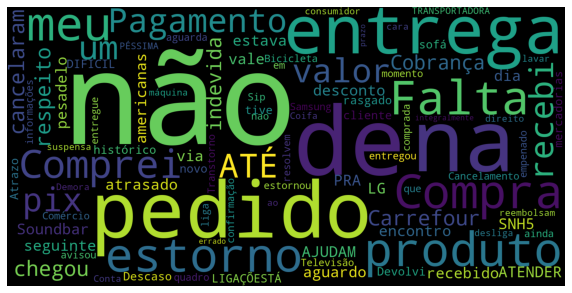

In [55]:
nuvemPalavras = ' '.join(reclamacoes)

wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(nuvemPalavras
                                                                                        )

fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudAutores);


In [ ]:
reclamacoes = dfReclamacoes['titulo_reclamacao1'] + " " + dfReclamacoes['titulo_reclamacao2'] + " " + dfReclamacoes['titulo_reclamacao3'] + " " + dfReclamacoes['titulo_reclamacao4']


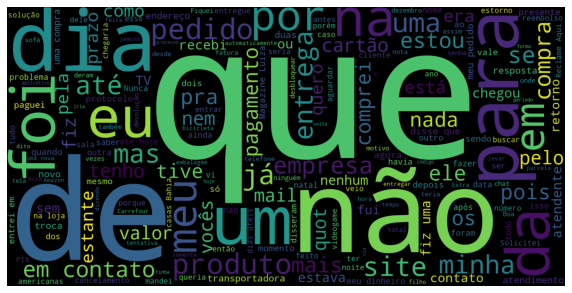

In [31]:

textoReclamacoes = df['Reclamacoes/0/texto']+ " " + df['Reclamacoes/1/texto']+ " " + df['Reclamacoes/2/texto']+ " " + df['Reclamacoes/3/texto']+ " " + df['Reclamacoes/4/texto']
nuvemPalavrasTexto = ' '.join(textoReclamacoes)
wordcloudAutores = WordCloud(background_color="black", width=1600, height=800).generate(nuvemPalavrasTexto
                                                                                        )

fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudAutores);


**ANALISE GRAFICA VISUAL**

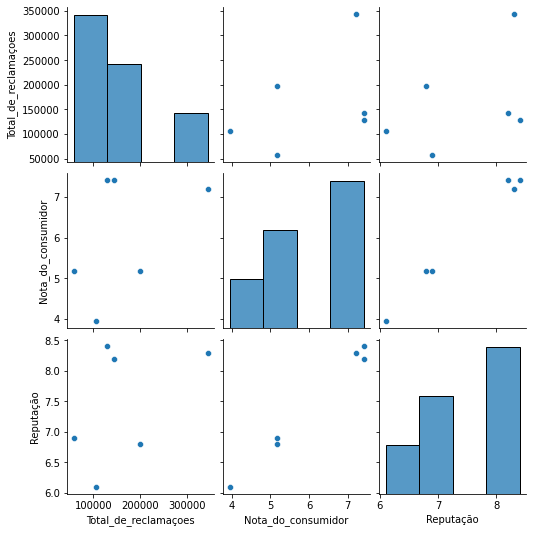

In [84]:
sb.pairplot(data=df[['Total_de_reclamaçoes', 'Nota_do_consumidor', 'Reputação']])


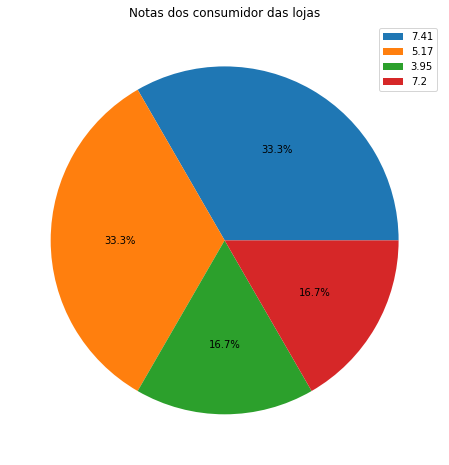

In [21]:
graficoNotaConsumidor = df['Nota_do_consumidor'].value_counts()
legenda = dados.index

fig, ax = plt.subplots(figsize = (9,8)) 

ax = plt.pie(dados, autopct='%1.1f%%')
plt.title('Notas dos consumidor das lojas')
plt.legend(legenda,loc= 'upper right')

plt.show()

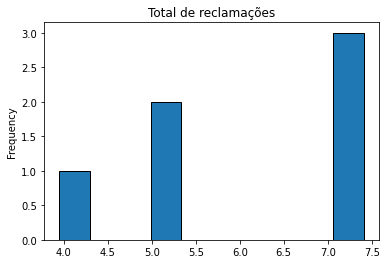

In [95]:
df['Nota_do_consumidor'].plot.hist(title='NOtas dos consumidore', edgecolor='black', bins = 10)


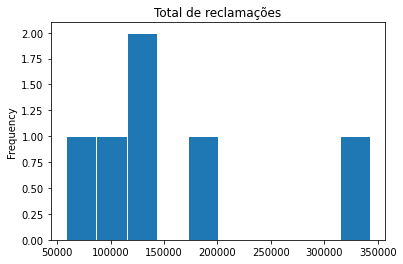

In [96]:
df['Total_de_reclamaçoes'].plot.hist(title='Total de reclamações', edgecolor='white', bins = 10)

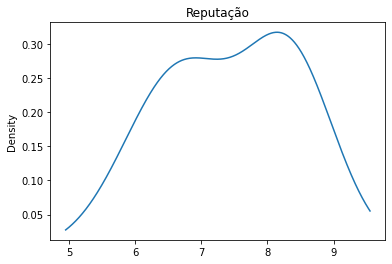

In [98]:
df['Reputação'].plot.kde(title='Reputação')
